# Cálculo de la ecuación que describe una catenaria

$$
\newcommand{\ve}[1]{{\vec{\boldsymbol{#1}}}}
\newcommand{\ma}[1]{{\boldsymbol{#1}}}
\newcommand{\hve}[1]{{\,\hat{\!\boldsymbol{#1}}}}
\newcommand{\tr}{\operatorname{tr}}
\newcommand{\dd}{\operatorname{d} \!}
$$

In [1]:
from sympy import init_printing, latex, symbols, Function, diff, sqrt, simplify, fraction, euler_equations

#Para imprimir bonito
init_printing()
from IPython.display import Math
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

In [2]:
# Declarar variables
x = symbols('x')
v = Function('v')(x)
vp = diff(v, x)
lamda = symbols('lambda')

# Definir la función Lagrange
L = (v + lamda)*sqrt(1 + vp**2)

# Se resuelve la ecuación de Euler-Lagrange
sol = simplify(diff(L, v) - diff(diff(L, vp), x))

imprimir("", sol, "= 0")

<IPython.core.display.Math object>

O alternativamente,

In [3]:
# Se resuelve la ecuación de Euler-Lagrange
sol = simplify(euler_equations(L, v, x)[0])

imprimir("", sol)

<IPython.core.display.Math object>

Se extrae el numerador de la ecuación de Euler-Lagrange:

In [4]:
num, den = fraction(sol.lhs)

imprimir("", num, "= 0")

<IPython.core.display.Math object>

Es decir, la solución a la ecuación de Euler-Lagrange es:
$$
\left(\frac{\dd v(x)}{\dd x}\right)^2 - \big(v(x) + \lambda\big) \frac{\dd^2 v(x)}{\dd x^2} + 1 = 0
$$
o alternativamente,
$$
\frac{\dd^2 v(x)}{\dd x^2} = \frac{1 + \left(\frac{\dd v(x)}{\dd x}\right)^2}{v(x) + \lambda}.
$$

Para resolver esta ecuación debemos convertirla en un sistema de dos ecuaciones diferenciales de orden 1, utilizando los cambios de variable:
\begin{align}
v_1 (x) &= v(x) + \lambda\\
v_2 (x) &= \frac{\dd v_1(x)}{\dd x} = \frac{\dd v(x)}{\dd x}.
\end{align}
Así pues, nuestro sistema de ecuaciones diferenciales queda:
\begin{align}
\frac{\dd v_1(x)}{\dd x} &= v_2(x)\\
\frac{\dd v_2(x)}{\dd x} &= \frac{1 + v_2(x)^2}{v_1(x)}.
\end{align}

In [5]:
from numpy import linspace, sqrt, sinh, cosh, polyfit, polyval, max
from matplotlib.pyplot import figure, plot, xlabel, ylabel, legend, show, grid, axis, gca
from scipy.optimize import fsolve

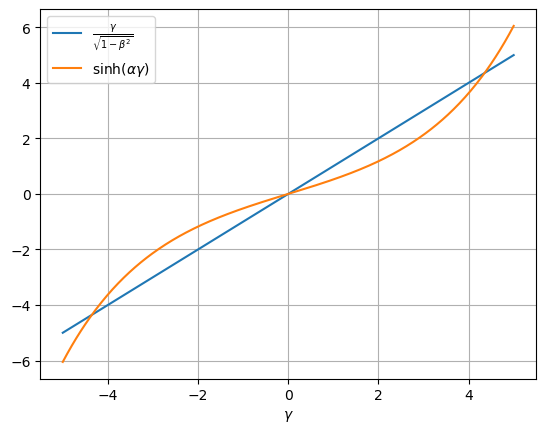

In [6]:
# Coordenadas (alpha, beta) del extremo derecho de la cuerda
alpha = 0.5
beta = 0

# Verificar si alpha y beta son físicamente posibles
assert alpha**2 + beta**2 < 1, "alpha y beta no son físicamente posibles"

# Visualizar las raíces de la ecuación
gamma = linspace(-5, 5, 400)

figure()
plot(gamma, gamma/sqrt(1-beta**2), label=r'$\frac{\gamma}{\sqrt{1 - \beta^2}}$')
plot(gamma, sinh(alpha*gamma),     label=r'$\sinh(\alpha\gamma)$')
xlabel(r'$\gamma$')
legend()
grid('on')
show()

La solución a la ecuación diferencial es:
$$
v(x) = \frac{1}{\gamma\sqrt{1-\beta^2}}\sinh(\gamma x)\big[\sinh(\gamma(\alpha-x)) + \beta\cosh(\gamma(\alpha-x))\big]
$$
donde $\gamma$ es una constante que satisface la ecuación 
$$
 \frac{\gamma}{\sqrt{1-\beta^2}} = \sinh(\alpha \gamma)
$$

In [7]:
# Calcular numéricamente la raíz cercana a gamma = 4
gamma = fsolve(lambda gamma : sinh(alpha*gamma) - gamma/sqrt(1 - beta**2), 4)[0]
print("gamma = ", gamma)

gamma =  4.3546379699306135


In [8]:
# Calcular los valores de x y de y
x = linspace(0, alpha, 101)
v = (1/(gamma*sqrt(1 - beta**2)))*sinh(gamma*x)*(sinh(gamma*(alpha - x)) + beta*cosh(gamma*(alpha - x)))

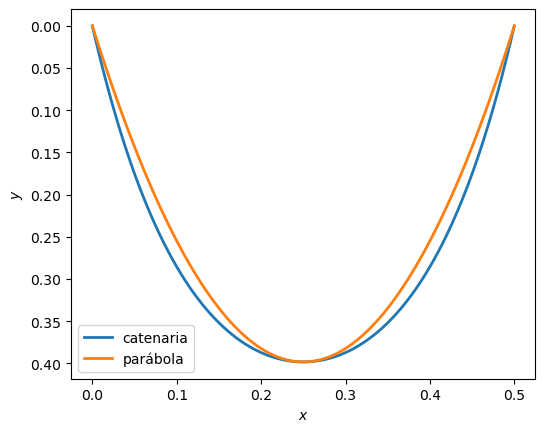

In [9]:
# Graficar
figure()
gca().set_aspect('equal', adjustable='box')
gca().invert_yaxis()

plot(x, v, linewidth=2, label='catenaria')

# Calcular la ecuación de la parábola
p = polyfit([0, alpha/2, alpha], [0, max(v), beta], 2)
plot(x, polyval(p, x), linewidth=2, label='parábola')
xlabel('$x$')
ylabel('$y$')
legend()
show()